Using tensorflow hub

Using CNN from Google, using Mobile Net V2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import PIL.Image as Image

In [2]:
# # This is the url for the tf2 pretrained model
# classifier_url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2'

In [3]:
# # For keras <=2
# image_shape = (224, 224)

# # Instantiate the classifier
# # Need to +(3,) to the image_shape to use RGB
# C = tf.keras.Sequential([
#     hub.KerasLayer(classifier_url, input_shape=image_shape+(3,)),
# ])

In [21]:
label_path = tf.keras.utils.get_file(
    'ImageNetLabels.txt',
    'https://storage.googleapis.com/ \
        download.tensorflow.org/data/ImageNetLabels.txt')

# The image net labels start with 'background'
# This does not seem to be used in mobilenet v3 (shape of prediction 1000 not 1001)
img_net_labels = np.array(open(label_path).read().splitlines())[1:]

In [4]:
image_shape = (224, 224)

C = tf.keras.applications.MobileNet(
    input_shape=image_shape+(3,),
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax',
)

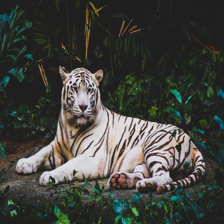

In [11]:
img = Image.open('../../Data/tiger.jpg').resize(image_shape)
img

In [12]:
# Rescale the image
img = np.array(img)/255.0
img.shape

(224, 224, 3)

In [25]:
# Predict with the model
# The new axis is needed as it is expecting batches and we are only giving it a single image to predict
r = C.predict(img[np.newaxis,...])
r.shape
# This prediction is 1000, not 1001 

TensorShape([1, 1000])

In [26]:
# The 0 is needed to make in an int not an array
predicted_class_id = np.argmax(r[0], axis=-1)
predicted_class_id

292

In [24]:
img_net_labels[predicted_class_id]

'tiger'

In [46]:
def predict_image(
    model: tf.keras.Model,
    file_path: str,
    img_labels: list[str],
    img_shape: tuple[int] = (224, 224),
    verbose: bool = True,
    ) -> str:
    # Load and scale the image
    img = Image.open(file_path)
    img_processed = img.resize(img_shape)
    img_processed = np.array(img_processed)/255.0
    y_pred = model.predict(img_processed[np.newaxis,...])
    y_pred_id = np.argmax(y_pred[0], axis=-1)
    y_pred_class = img_labels[y_pred_id]
    if verbose:
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.imshow(img)
        ax.set(title=f'Prediction: {y_pred_class.title()}')
        ax.axis('off')
    return y_pred_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


'tiger'

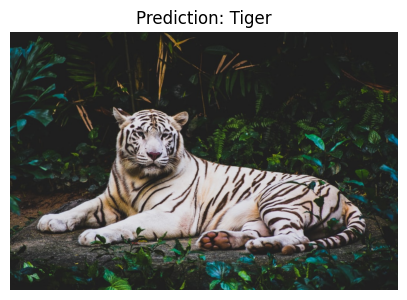

In [47]:
predict_image(C, '../../Data/tiger.jpg', img_net_labels)

In [55]:
test_cases = 100
catagory_string = '003.backpack/003_'
catagory = 'backpack'
picture_path = ['../../Data/Calteck_DataSet_256_ObjectCategories/'\
    + catagory_string + f'{i+1}'.zfill(4)\
        +'.jpg' for i in range(test_cases)]
correct = 0
for picture in picture_path:
    y_pred = predict_image(C, picture, img_net_labels, verbose=False)
    if y_pred == catagory:
        correct += 1
print(f'\nOut of {test_cases} predictions:\nPredicted "{catagory}" {correct/test_cases*100:.2f}% of the time')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━